<a href="https://colab.research.google.com/github/archie-sinha/Evolutionary-Computing/blob/main/EC_6_Genetic_Algorithms_GP_and_DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Archisha Sinha**
##Domain: Evolutionary Computing
##Topic: Genetic Algorithms
## - Genetic Programming
## - Differential Eveolution

#Installation


In [ ]:
!pip install deap
!pip install pgmpy
!pip install graphviz
!apt install libgraphviz-dev
!pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 33 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,03

In [ ]:
import random
import pygraphviz as pgv
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
import operator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#Genetic Programing

x^2 + x + 1

In [ ]:
pset = gp.PrimitiveSet("main", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(operator.mul, 2)
pset.renameArguments(ARG0="x")
pset.addTerminal(1)

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin,pset=pset)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genGrow, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual,toolbox.expr)

In [ ]:
expr = gp.genGrow(pset, min_=1, max_=3)
tree = gp.PrimitiveTree(expr)
str(tree)

'add(mul(x, x), mul(x, x))'

In [ ]:
function = gp.compile(tree, pset)
function(2)

8

In [ ]:
def display_tree(t):
  nodes, edges, labels = gp.graph(t)

  g = pgv.AGraph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  g.layout(prog="dot")

  for i in nodes:
      n = g.get_node(i)
      n.attr["label"] = labels[i]

  g.draw("tree.pdf")
  display(g)

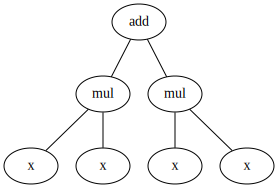

In [ ]:
display_tree(expr)

In [ ]:
def equation(x):
  return x**2 + x + 1

In [ ]:
def eval_func(individual, points):
    # Compile the expression
    func = toolbox.compile(expr=individual)
    # Evaluate the mean absolute error
    return np.mean(np.abs(func(points) - equation(points))),

In [ ]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genGrow, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)
toolbox.register("evaluate", eval_func, points=np.linspace(-1, 1, 100))
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)


POP_SIZE = 100
MAX_GEN = 20

# Create initial population
pop = toolbox.population(n= POP_SIZE)

# Run the GP algorithm
for gen in range(MAX_GEN):
    offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.1)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    pop = toolbox.select(offspring, k=len(pop))

    best_ind = tools.selBest(pop, k=1)[0]
    best_fitness = best_ind.fitness.values[0]
    print(f"Generation {gen+1}, Best Fitness: {best_fitness}")
    print(f"Best Individual: {best_ind}")
    print(f"Population size: {len(pop)}")
    print()
    if(best_fitness==0):
      break

Generation 1, Best Fitness: 6.661338147750939e-18
Best Individual: add(mul(x, x), mul(1, add(x, 1)))
Population size: 100

Generation 2, Best Fitness: 6.661338147750939e-18
Best Individual: add(add(x, 1), mul(x, x))
Population size: 100

Generation 3, Best Fitness: 6.661338147750939e-18
Best Individual: add(add(x, 1), mul(x, x))
Population size: 100

Generation 4, Best Fitness: 6.661338147750939e-18
Best Individual: add(add(x, 1), mul(x, x))
Population size: 100

Generation 5, Best Fitness: 6.661338147750939e-18
Best Individual: add(add(x, 1), mul(x, x))
Population size: 100

Generation 6, Best Fitness: 6.661338147750939e-18
Best Individual: add(mul(x, x), add(x, 1))
Population size: 100

Generation 7, Best Fitness: 6.661338147750939e-18
Best Individual: add(add(x, 1), mul(x, x))
Population size: 100

Generation 8, Best Fitness: 6.661338147750939e-18
Best Individual: add(add(1, x), mul(x, x))
Population size: 100

Generation 9, Best Fitness: 6.661338147750939e-18
Best Individual: add(m

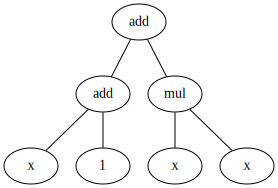

In [ ]:
display_tree(best_ind)

#Differential evolution

Minimization

x1 + x2 + x3

In [ ]:
population=pd.DataFrame(columns=["x1","x2","x3","F(x)"])
population

,x1,x2,x3,F(x)


In [ ]:
for i in range(10):
  x1,x2,x3=random.random(),random.random(),random.random()
  population.loc[i]=[x1,x2,x3,x1+x2+x3]
population

,x1,x2,x3,F(x)
0,0.865429,0.740312,0.770865,2.376607
1,0.813428,0.785171,0.103449,1.702048
2,0.280485,0.066227,0.719936,1.066648
3,0.718203,0.112498,0.608551,1.439253
4,0.223123,0.088241,0.875180,1.186545
5,0.129638,0.462972,0.086677,0.679287
6,0.955025,0.678305,0.703256,2.336586
7,0.950558,0.812140,0.284171,2.046869
8,0.587809,0.225089,0.384362,1.197260
9,0.807539,0.644945,0.015537,1.468022


F=0.1

N=10

Cr=0.5


In [ ]:
x=random.choice(range(10))
y=random.choice(range(10))
z=random.choice(range(10))
F=0.1
v=[population.loc[x,"x1"]+F*(population.loc[y,"x1"]-population.loc[z,"x1"]),population.loc[x,"x2"]+F*(population.loc[y,"x2"]-population.loc[z,"x2"]),population.loc[x,"x2"]+F*(population.loc[y,"x2"]-population.loc[z,"x2"])]
print("V=",v)

V= [0.7933797461485702, 0.6556312804626547, 0.6556312804626547]


In [ ]:
j=random.choice(range(10))
p=list(population.iloc[j])[:3]
p

[0.8134275712091837, 0.7851711109161225, 0.10344939404575282]

In [ ]:
cr=0.5
u=[]
for i in range(3):
  r=random.random()
  if r<=cr:
    u.append(v[i])
  else:
    u.append(p[i])
u

[0.7933797461485702, 0.6556312804626547, 0.10344939404575282]